# Case study for an experimt that employs a naturalistic setting: COSMIC

In [1]:
import os
import re
import numpy as np
from scipy import ndimage

import sys
import pickle
import json
import tables

import importlib.util #import from superordinate folder
spec =importlib.util.spec_from_file_location("helper",str(re.search("(.*/)",os.getcwd()).groups(0)[0])+"helper.py")
helper = importlib.util.module_from_spec(spec)
spec.loader.exec_module(helper)

In [2]:
#Now you can zoom
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [42]:
import pandas as pd
def print_table(dataframe, heading = " ", heading_indent = 4, subtext ="",three_levels = False):
    pd.set_option('display.max_colwidth', -1)
    
    heading = heading.replace("\\t","&nbsp;&nbsp;&nbsp;&nbsp;")
    heading = heading.replace(" ","&nbsp;")
    subtext = subtext.replace("\\t","&nbsp;&nbsp;&nbsp;&nbsp;")
    subtext = subtext.replace("\\n","<br>")

    if type(dataframe) == dict:
        if three_levels:
            dataframe = df_from_nested_dict(dataframe)
        else:
            dataframe = pd.DataFrame.from_dict(dataframe)

    dataframe = pd.DataFrame(dataframe)
    
    html_string = dataframe.to_html()
    
    
    html_string = html_string.replace("\\t","&nbsp;&nbsp;&nbsp;&nbsp;")
    html_string = html_string.replace("\\n","<br>")
    html_string = html_string.replace('<table border="1" class="dataframe">', '<table border="{}" cellpadding="{}" cellspacing="0" class="dataframe">'.format(10,10))
    

    
    display(HTML(  '<html>'
                 + '<h4 style="color: DarkBlue;text-align: left; padding-left:{0:3}px;">'.format(heading_indent)
                 + heading
                 + '</h4>'
                 + html_string
                 + '<div style="font-size: 12px">'
                 + subtext
                 + "</div>"
                 + "</html>"))
    pd.set_option('display.max_colwidth', 50)


def df_from_nested_dict(d):
    return pd.DataFrame.from_dict({(i,j): d[i][j] for i in d.keys() for j in d[i].keys()},orient='index')

# Compute motion and EEG signals

In [3]:
with open("child_static_size.json") as fh:
    json = json.load(fh)

In [4]:
mot = tables.open_file("cosmic.mot")

In [5]:
data = mot.root.motion_tensor

In [6]:
hist = helper.weighted_histograms(data, roi = json)

0.0
0.001906250595703311
0.003812501191406622
0.005718751787109934
0.007625002382813244
0.009531252978516556
0.011437503574219868
0.013343754169923177
0.015250004765626489
0.0171562553613298
0.019062505957033113
0.020968756552736424
0.022875007148439735
0.024781257744143047
0.026687508339846355
0.028593758935549666
0.030500009531252977
0.03240626012695629
0.0343125107226596
0.036218761318362915
0.038125011914066226
0.04003126250976954
0.04193751310547285
0.04384376370117616
0.04575001429687947
0.04765626489258278
0.049562515488286094
0.0514687660839894
0.05337501667969271
0.05528126727539602
0.05718751787109933
0.05909376846680264
0.061000019062505954
0.06290626965820927
0.06481252025391258
0.06671877084961589
0.0686250214453192
0.07053127204102251
0.07243752263672583
0.07434377323242913
0.07625002382813245
0.07815627442383576
0.08006252501953907
0.08196877561524238
0.0838750262109457
0.085781276806649
0.08768752740235232
0.08959377799805562
0.09150002859375894
0.09340627918946225
0.09

0.8120627537696106
0.8139690043653138
0.8158752549610172
0.8177815055567205
0.8196877561524238
0.8215940067481271
0.8235002573438304
0.8254065079395337
0.827312758535237
0.8292190091309404
0.8311252597266436
0.833031510322347
0.8349377609180503
0.8368440115137536
0.8387502621094569
0.8406565127051602
0.8425627633008635
0.8444690138965668
0.8463752644922702
0.8482815150879734
0.8501877656836768
0.8520940162793801
0.8540002668750833
0.8559065174707867
0.85781276806649
0.8597190186621934
0.8616252692578966
0.8635315198536
0.8654377704493033
0.8673440210450066
0.8692502716407099
0.8711565222364132
0.8730627728321165
0.8749690234278198
0.8768752740235232
0.8787815246192264
0.8806877752149298
0.8825940258106331
0.8845002764063363
0.8864065270020397
0.888312777597743
0.8902190281934463
0.8921252787891496
0.894031529384853
0.8959377799805562
0.8978440305762595
0.8997502811719629
0.9016565317676661
0.9035627823633695
0.9054690329590728
0.9073752835547761
0.9092815341504794
0.9111877847461828
0.

In [7]:
import matplotlib.pyplot as plt

In [8]:
hist = ndimage.gaussian_filter(hist[:,],10)
motion_1d = np.mean(hist,axis =0)

left = np.sum(hist[0:5,:],axis=0)+np.sum(hist[31:,:],axis=0)
down = np.sum(hist[5:14,:],axis=0)
right = np.sum(hist[14:23,:],axis=0)
up = np.sum(hist[23:31,:],axis=0)

In [9]:
path = os.getcwd()+"/cosmic.eeg"
electrode_names= ['Fz_1', 'F3_1', 'F7_1', 'F9_1', 'FT7_1', 'FC3_1', 'FC1_1', 'Cz_1',
       'C3_1', 'T7_1', 'CP3_1', 'Pz_1', 'P3_1', 'P7_1', 'PO9_1', 'O1_1',
       'O2_1', 'PO10_1', 'P8_1', 'P4_1', 'CP4_1', 'TP10_1', 'T8_1',
       'C4_1', 'FT8_1', 'FC4_1', 'FC2_1', 'F4_1', 'F8_1', 'F10_1', 'V1_1',
       'V2_1', 'Fz_2', 'F3_2', 'F7_2', 'F9_2', 'FT7_2', 'FC3_2', 'FC1_2',
       'Cz_2', 'C3_2', 'T7_2', 'CP3_2', 'Pz_2', 'P3_2', 'P7_2', 'PO9_2',
       'O1_2', 'O2_2', 'PO10_2', 'P8_2', 'P4_2', 'CP4_2', 'TP10_2',
       'T8_2', 'C4_2', 'FT8_2', 'FC4_2', 'FC2_2', 'F4_2', 'F8_2', 'F10_2',
       'V1_2', 'V2_2']
vmrk = "cosmic.vmrk"
exclude = []

In [10]:
reference = np.nanmean(helper.load_eeg(path,participant=1),axis = 0)
print(".", end = "")
eegs = []
for electrode in range(32,64):#PARTICIPANT 1!!
    print(".",end= "")
    current_signal = helper.load_eeg(path, electrode)-reference
    eegs.append(current_signal)

/home/gerstenberger/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.


.................................

# Select period of interest

In [11]:
#load VMRK cut off intial part before video start trigger 
vmrk_info = helper.parse_vmrk(vmrk)
time = int(vmrk_info["time"][vmrk_info["description"].index("R128")])

for i in range(len(eegs)):
    eegs[i] = eegs[i][time:]    

In [12]:
#select period.convert indices to eeg samplespoints sequence, cut signal accordingly
start = 46142#in frames
end = 51961

poi = []
for eeg in eegs:
    poi.append(eeg[start*20:end*20])

In [13]:
motion_1d = motion_1d[start:end]

# ICA on raw data

In [14]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

from sklearn.decomposition import FastICA, PCA

In [15]:
n_comp = len(poi)

poi = np.array(poi)

for i in range(n_comp):#replace missing values with maximum as theywere cut off
    maximum = np.nanmax(poi[:,i])
    poi[np.isnan(poi)]=maximum

In [16]:
ica = FastICA(n_components=n_comp)
comps = ica.fit_transform(poi.T)
comps = comps.T

# Direct correlation of ICA components and motion

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

import matplotlib.pyplot as plt
from scipy import interpolate

def density_scatter(x,y,ax):
    # Calculate the point density
    xy = np.vstack([x,y])
    z = gaussian_kde(xy)(xy)

    # Sort the points by density, so that the densest points are plotted last
    idx = z.argsort()
    x, y, z = x[idx], y[idx], z[idx]
    ax.scatter(x, y, c=z, s=50, edgecolor='')
    
def rescale(y, factor):
    """ Upscales by factor by means of linear interpolation"""
    factor += (1/len(y))*factor
    factor = 1/factor
    
    x = np.arange(0,len(y))
    f = interpolate.interp1d(x, y)

    xnew = np.arange(0, len(x)-1,factor)
    return f(xnew)

In [18]:
comps[0].shape

(116380,)

In [19]:
from scipy.stats import stats

In [37]:
mot_large = rescale(motion_1d,20)

corr = []
for comp in comps:
    slope, intercept, r_value, p_value, std_err = stats.linregress(mot_large, comp)
    corr.append(r_value)

Text(0.5, 0, 'Component')

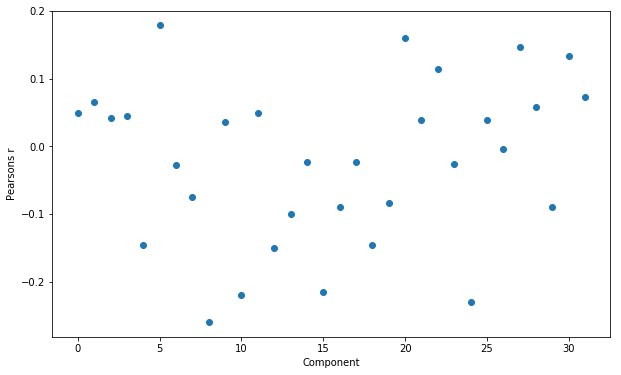

In [21]:
fig, ax = plt.subplots(1,figsize=(10,6))
ax.plot(corr, linestyle="", marker = "o")
ax.set_ylabel("Pearsons r")
ax.set_xlabel("Component")

In [22]:
import matplotlib.gridspec as gridspec

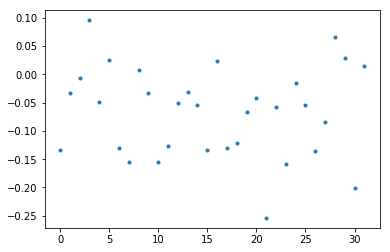

In [105]:
raw_corrs = []
raw_slope = []
for raw in poi:
    slope, intercept, r_value, p_value, std_err = stats.linregress(mot_large,raw)
    raw_corrs.append(r_value)
    raw_slope.append(slope)
plt.plot(raw_corrs,linestyle="",marker = ".")

In [113]:
datadict = {}
datadict[""] = ["Pearsons r","Slope"]
for x in range(32):
    datadict[str(x)] = ["{0:1.2f}".format(raw_corrs[x]),"{0:1.2f}".format(raw_slope[x])]
    
df = pd.DataFrame(datadict)
df = df.set_index("")
print_table(df,"Table X: Correlation between motion and raw EEGs")

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Pearsons r,-0.13,-0.03,-0.01,0.10,-0.05,0.03,-0.13,-0.15,0.01,-0.03,-0.16,-0.13,-0.05,-0.03,-0.05,-0.13,0.02,-0.13,-0.12,-0.07,-0.04,-0.25,-0.06,-0.16,-0.02,-0.05,-0.14,-0.08,0.07,0.03,-0.20,0.01
Slope,-526.04,-135.18,-28.16,448.84,-209.87,103.78,-515.04,-615.79,33.26,-125.57,-604.21,-457.68,-281.81,-102.48,-167.27,-479.16,79.53,-597.08,-503.30,-253.90,-151.63,-1130.62,-236.29,-653.78,-56.41,-213.07,-607.53,-348.73,305.61,131.79,-1057.17,59.13


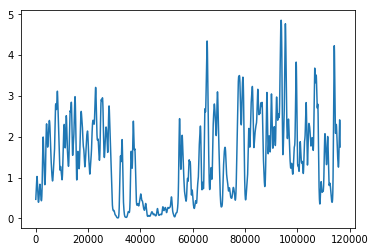

In [116]:
plt.plot(mot_large)

.........

Text(0.5, 0.98, 'Fig 8: Correlation between ICA components and movement score')

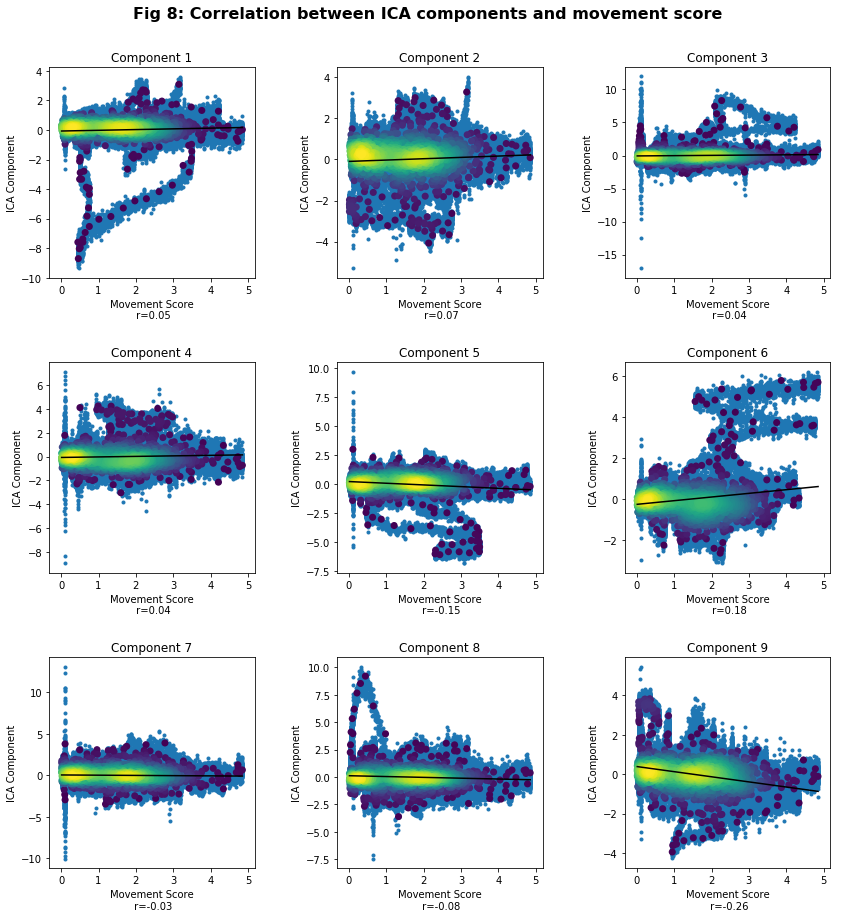

In [115]:
gs = gridspec.GridSpec(3,3)

fig = plt.figure(figsize=(14, 14))
fig.suptitle("")


axes = []
for y in range(3):
    for x in range(3):
        axes.append(plt.subplot(gs[y,x]))

#mot_large = mot_large - np.mean(mot_large)
mot_large /= np.std(mot_large)

for ax,comp,i in zip(axes,comps,np.arange(1,10)):
    print(".",end="")
    comp = comp-np.mean(comp)
    comp /= np.std(comp)
    
    
    ax.scatter(mot_large,comp, marker = ".")
    density_scatter(mot_large[::100],comp[::100], ax)
    slope, intercept, r_value, p_value, std_err = stats.linregress(mot_large,comp)
    
    miny = np.min(comp)
    maxy = np.max(comp)
    
    
    minx = np.min(mot_large)
    maxx = np.max(mot_large)
    
    ax.set_title("Component " + str(i))
    
    ax.set_xlabel("Movement Score"+"\n r={0:1.2f}".format(r_value))
    ax.set_ylabel("ICA Component")
    
    
    #Draw regression line
    x = np.linspace(minx,maxx,10)
    y = slope *x + intercept
    
    ax.plot(x,y,color="black")
    
fig.subplots_adjust(top=0.92, wspace = 0.4, hspace=.4)
fig.suptitle("Fig 8: Correlation between ICA components and movement score", fontweight = "bold", fontsize = "16")

# Frequency power of ICA components

In [49]:
def frequency_bands(signals):
    """ Computes bandpower for a list/array of raw EEG signals"""
    alpha = []
    beta = []
    gamma_low = []
    gamma_high = []

    freq_alpha = [8,14]#Cut frequencies from fft spectrogram
    freq_beta = [14,30]
    freq_gamma_low = [30,50]
    freq_gamma_high = [50,100]

    for current_signal in signals:
        spectrum = np.abs(helper.spectrogram(current_signal, f_min=0,f_max=100))

        alpha.append(np.nansum(spectrum[freq_alpha[0]:freq_alpha[1],:],axis=0))
        beta.append(np.nansum(spectrum[freq_beta[0]:freq_beta[1],:],axis=0))
        gamma_low.append(np.nansum(spectrum[freq_gamma_low[0]:freq_gamma_low[1],:],axis=0))
        gamma_high.append(np.nansum(spectrum[freq_gamma_high[0]:freq_gamma_high[1],:],axis=0))

    return alpha, beta, gamma_low,gamma_high

alpha, beta, gamma_low,gamma_high = frequency_bands(comps)


................................................................

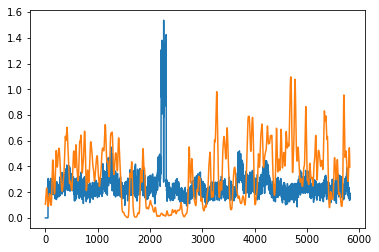

In [19]:
plt.plot(beta[0])
plt.plot(motion_1d/100)

6.492959973521405e-36
0.1629479392163651


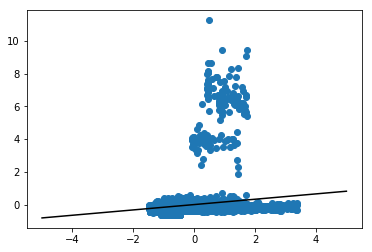

In [212]:
comp_freq = beta[3]
comp_freq = (comp_freq-np.mean(comp_freq))/np.std(comp_freq)
mot = (motion_1d-np.mean(motion_1d))/np.std(motion_1d)

plt.scatter(mot,comp_freq)
#plt.imshow(scatter_colormap(mot,comp_freq))
print(stats.linregress(comp_freq,mot)[3])

slope = stats.linregress(mot,comp_freq)[0]
intercept = stats.linregress(mot,comp_freq)[1]

print(slope)

plt.plot(np.linspace(-5,5,5),intercept+np.linspace(-5,5,5)*slope,color="black")

(-1, 1)

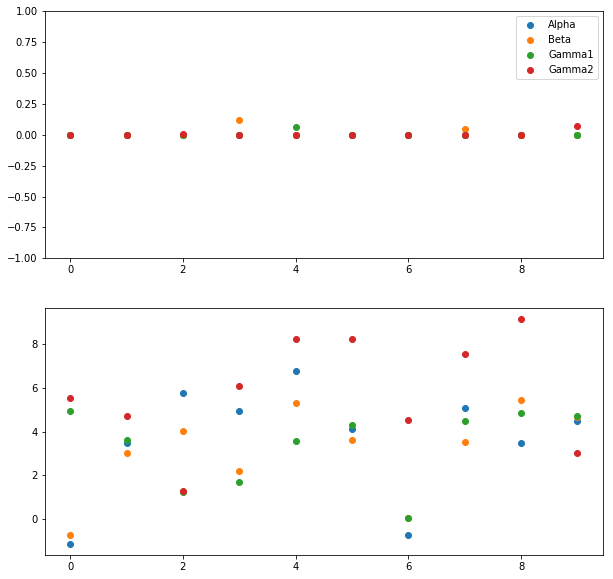

In [44]:
fig,ax = plt.subplots(2,figsize=(10,10))
for band, bandname in zip([alpha,beta,gamma_low,gamma_high],["Alpha","Beta","Gamma1","Gamma2"]):
    corrs = []
    slopes = []
    for comp_freq in band:
        pearsons = stats.linregress(comp_freq,motion_1d)[3]
        corrs.append(pearsons)
        slopes.append(stats.linregress((motion_1d/np.std(motion_1d))-np.std(motion_1d),(comp_freq/np.std(comp_freq))-np.mean(comp_freq))[1])
    ax[0].plot(corrs[:10], linestyle="", marker = "o", label=bandname)
    ax[1].plot(slopes[:10], linestyle="",marker = "o")
    
ax[0].legend()
ax[0].set_ylim(-1,1)

# ICA on frequency spectrum

In [98]:
alpha, beta, gamma_low,gamma_high = frequency_bands(poi)

................................................................

In [110]:
comps_for_bands = []

/home/gerstenberger/miniconda3/lib/python3.6/site-packages/sklearn/decomposition/fastica_.py:121: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
/home/gerstenberger/miniconda3/lib/python3.6/site-packages/sklearn/decomposition/fastica_.py:121: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


(-1, 1)

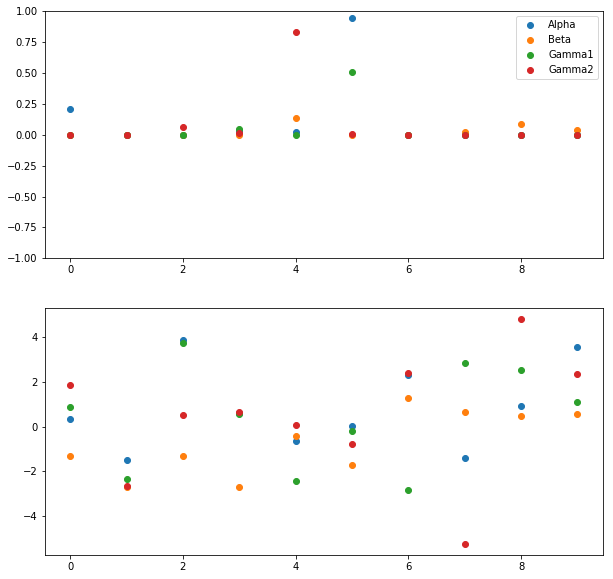

In [111]:
fig,ax = plt.subplots(2,figsize=(10,10))
for band, bandname in zip([alpha,beta,gamma_low,gamma_high],["Alpha","Beta","Gamma1","Gamma2"]):
    ica = FastICA(n_components=32)
    comps = ica.fit_transform(np.array(band).T).T  # Reconstruct signals
    comps_for_bands.append(comps)
    
    corrs = []
    slopes = []
    for comp in comps:
        pearsons = stats.linregress(comp,motion_1d)[3]
        corrs.append(pearsons)
        slopes.append(stats.linregress((motion_1d/np.std(motion_1d))-np.std(motion_1d),(comp/np.std(comp))-np.mean(comp))[1])
    ax[0].plot(corrs[:10], linestyle="", marker = "o", label=bandname)
    ax[1].plot(slopes[:10], linestyle="",marker = "o")
    
ax[0].legend()
ax[0].set_ylim(-1,1)

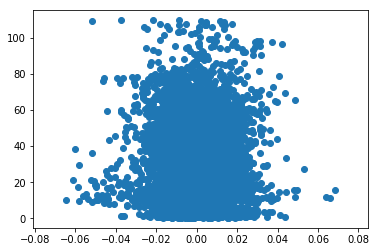

In [216]:
plt.scatter(comps_for_bands[3][4],motion_1d)
#plt.imshow(scatter_colormap(comps_for_bands[3][4],motion_1d),cmap="plasma")

In [210]:
def scatter_colormap(signal1, signal2):
    signal1 = signal1 - np.mean(signal1)
    signal1/=np.std(signal1)
    signal2 = signal2 - np.mean(signal2)
    signal2/=np.std(signal2)
    
    factor = 10
    
    xmin = np.min(signal1*factor)
    xmax = np.max(signal1*factor)
    ymin = np.min(signal2*factor)
    ymax = np.max(signal2*factor)
    
    size = (int(ymax-ymin)+1,int(xmax-xmin)+1)
    print(size)
    colormap = np.zeros(size)
    for x,y in zip(signal1,signal2):
        colormap[int(y*factor-ymin)][int(x*factor-xmin)] += 1
    return colormap

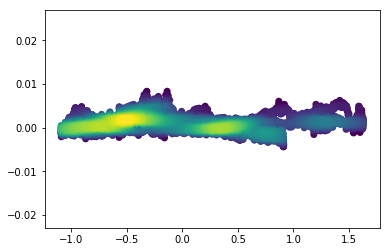

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

def density_scatter(x,y,ax):
    # Calculate the point density
    xy = np.vstack([x,y])
    z = gaussian_kde(xy)(xy)

    # Sort the points by density, so that the densest points are plotted last
    idx = z.argsort()
    x, y, z = x[idx], y[idx], z[idx]
    ax.scatter(x, y, c=z, s=50, edgecolor='', marker = "o")

    
# Generate fake data
x = np.random.normal(size=1000)
y = x * 3 + np.random.normal(size=1000)

fig, ax = plt.subplots()
density_scatter(mot_large[0:10000],comps[0][:10000],ax)